# The Shape of Data and Rough Curve Fitting

# Read in some data

> We've left you some data in a file called "data1". Let's check it out!  
> We are going to read in some data using the command "read.table".   
> Because this command reads in data as a "list" structure, we will "unlist it" and turn it into a vector. The letter "c" is used in R to define a vector.  

> In the cell below, type  
`mydata<-read.table("data1")`  
`mydata<-c(unlist(mydata))`

Hold down "Shift" and press "Enter" to run the commands in this jupyter notebook.

In [3]:
mydata<-read.table("data1")
mydata<-c(unlist(mydata))

> Let's get some quick and basic measurements from the data.  
In the cell below, type  
`length(mydata)`  
`mean(mydata)`  
`var(mydata`)

>Run the commands.

In [2]:
length(mydata)
mean(mydata)
var(mydata)

[1] 1000

[1] 0.3437257

[1] 0.1202137

# Making a histogram  

> In the cell below, type `hist(mydata)`  

> (From this point forward, go ahead and run the commands when you are ready.)


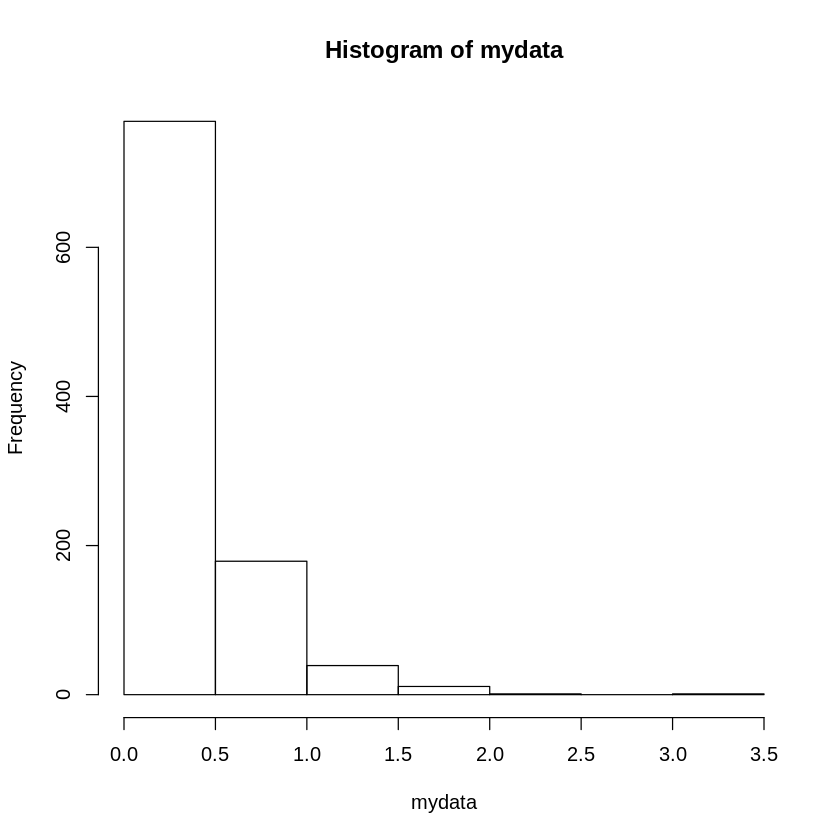

In [4]:
hist(mydata)

> Great! Now, let's take a little more control in the appearance of the histogram. For example, the default bin width you are seeing is probably 0.5. Lets change it to 0.1. In order to do this, we will have to define the breakpoints as a sequence of numbers.

> In the next cell, type 

`min(mydata)`  
`max(mydata)`

In [5]:
min(mydata)
max(mydata)

[1] 0.0007510328

[1] 3.129895

> Suppose that your minimum and maximum are 0.0220296 and 3.406938. In what follows, use <b>your</b> actual numbers.

> Make a sequence (vector) of bin breaks, each which length 0.1,that will include your minimum and maximum. We will call it "br". In the next cell, type `br<-seq(0,3.5,0.1)`

> Notice how, in this example, we have used the closest numbers to one decimal place that will fully cover the entire dataset.

> We will now remake the histogram. In real life you would go back up to the cell where you made the previous histogram, edit your code and run it there. In order to keep these instructions flowing in a linear way, we will make an entirely new histogram below.

> Add this to the cell under your line defining the sequence of breaks.  `hist(mydata,prob=T,breaks=br')`

> The "prob=T" part will put density on the y-axis as opposed to counts. This will make the histogram bars scale so that the <u>total area in the bar</u> between 0.2 and 0.3 (for example) <u>will be equal to the proportion</u> of values in the data set that are between 0.2 and 0.3. This is important because we are going to try to superimpose a true pdf on the histogram and area under a pdf gives probability.

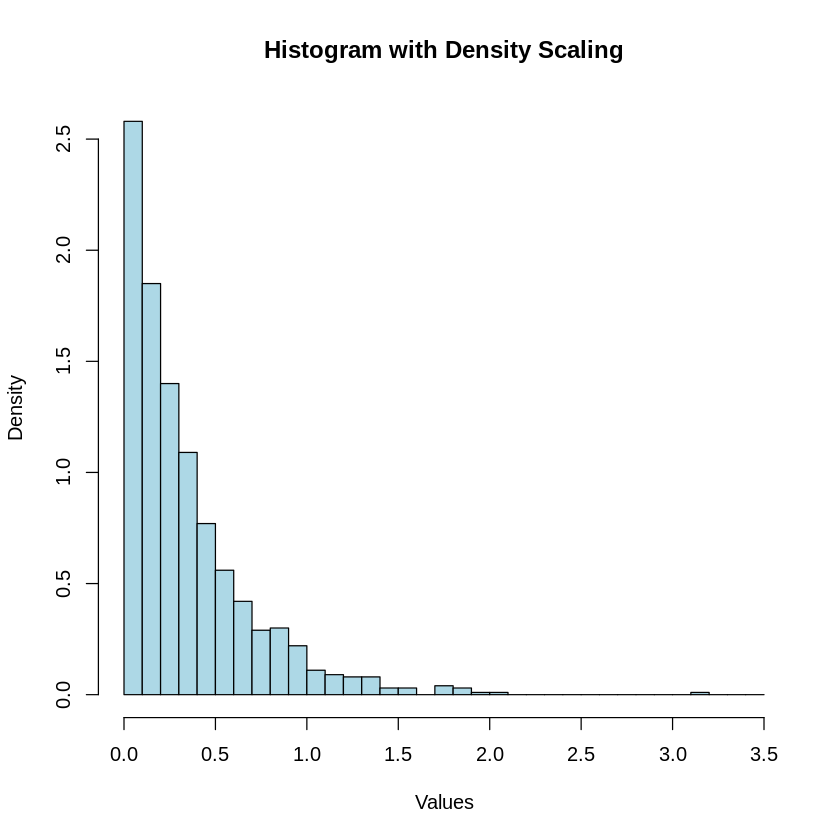

In [9]:
# Define the sequence of bin breaks
br <- seq(0, 3.5, 0.1)

# Generate a histogram with density scaling
hist(mydata, prob = TRUE, breaks = br, 
     main = "Histogram with Density Scaling", 
     xlab = "Values", 
     ylab = "Density", 
     col = "lightblue", 
     border = "black")

# Superimposing a curve

> Is it just us or does this look like an exponential distribution?  
> Recall that $\lambda$, the rate parameter for the exponential distribution is 1 divided by the true mean of the distribution.
> Since $\lambda$ is unknown, we will try to estimate it by using 1 divided by the sample mean.  That is, we will estimate $\lambda$ with  $\widehat{\lambda} = 1/\overline{X}$.  
> In the next cell, define a variable named "lambdahat" and set it to be 1 over the sample mean.

In [7]:
# Estimate lambda (rate parameter) for the exponential distribution
lambdahat <- 1 / mean(mydata)

# Print the estimated lambda
print(lambdahat)


[1] 2.909297


> Let's superimpose the exponential density on our histogram using our estimated $\lambda$. The easiest way to do this is not to make a function but rather a sequence of points where we connect the dots.

> Create a sequence of x-values. We'll make them really close together so that out "dot connecting" looks smooth.

> In the next cell, type. `x<-seq(0,3,0.001)`

> Now let's get the pdf values. Add this to the cell. `fx<-lambdahat*exp(-lambdahat*x)`

> Go back to the previous cell where you made your last histogram and add the line by typing `lines(x,fx)`.


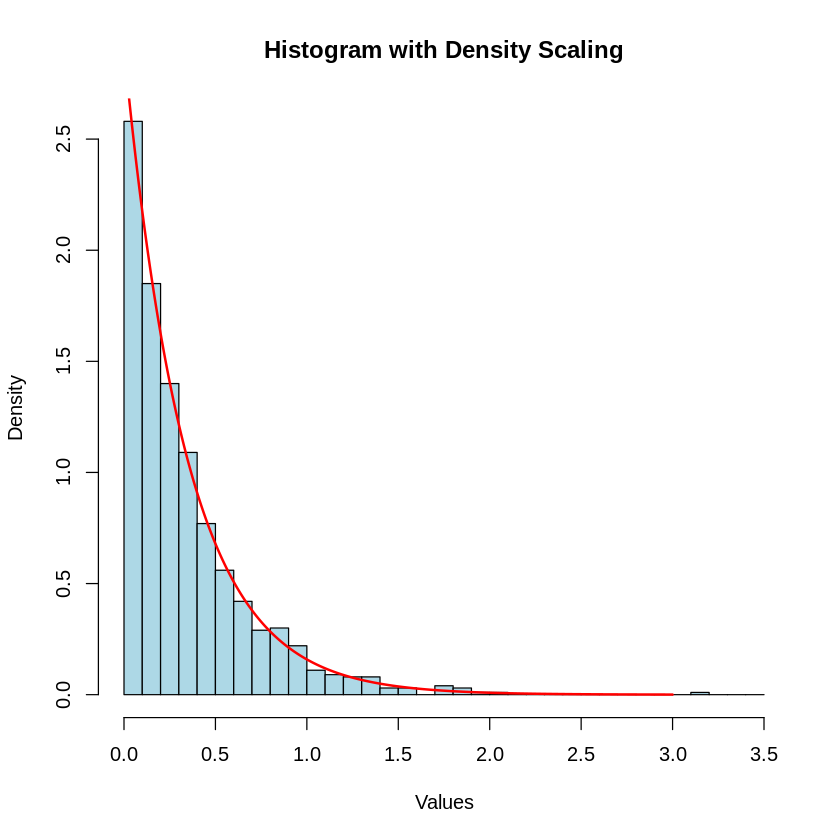

In [11]:
# Define the sequence of bin breaks
br <- seq(0, 3.5, 0.1)

# Generate a histogram with density scaling
hist(mydata, prob = TRUE, breaks = br, 
     main = "Histogram with Density Scaling", 
     xlab = "Values", 
     ylab = "Density", 
     col = "lightblue", 
     border = "black")

# Create a sequence of x-values for the density curve
x <- seq(0, 3, 0.001)

# Compute the estimated exponential density values
fx <- lambdahat * exp(-lambdahat * x)

# Overlay the exponential density curve
lines(x, fx, col = "red", lwd = 2)


# A Mystery Data Set

> Following the commands at the beginning of this lab. Read in the data set called "data2".

> Take a look at the shape of the data by making a histogram. Be sure to use "density" on the $y$-axis and adjust the breaks to make the histogram look nice to you. (Too few bins and the histogram will look "chunky" and will miss a lot of the shape detail. Too many bins can result in some bins being empty while a neighboring bin is very "spiky".

'data.frame':	1999 obs. of  5 variables:
 $ X0.04511932: num  0.24804 0.00237 0.44272 0.01582 0.18918 ...
 $ X0.3476407 : num  0.2117 0.0478 0.0191 0.0513 0.8511 ...
 $ X0.07969543: num  0.1 0.664 0.275 1.003 1.572 ...
 $ X0.1851137 : num  0.02957 0.21845 0.00199 4.05038 0.28158 ...
 $ X0.09308473: num  0.07031 0.50142 0.00771 0.09119 0.17444 ...


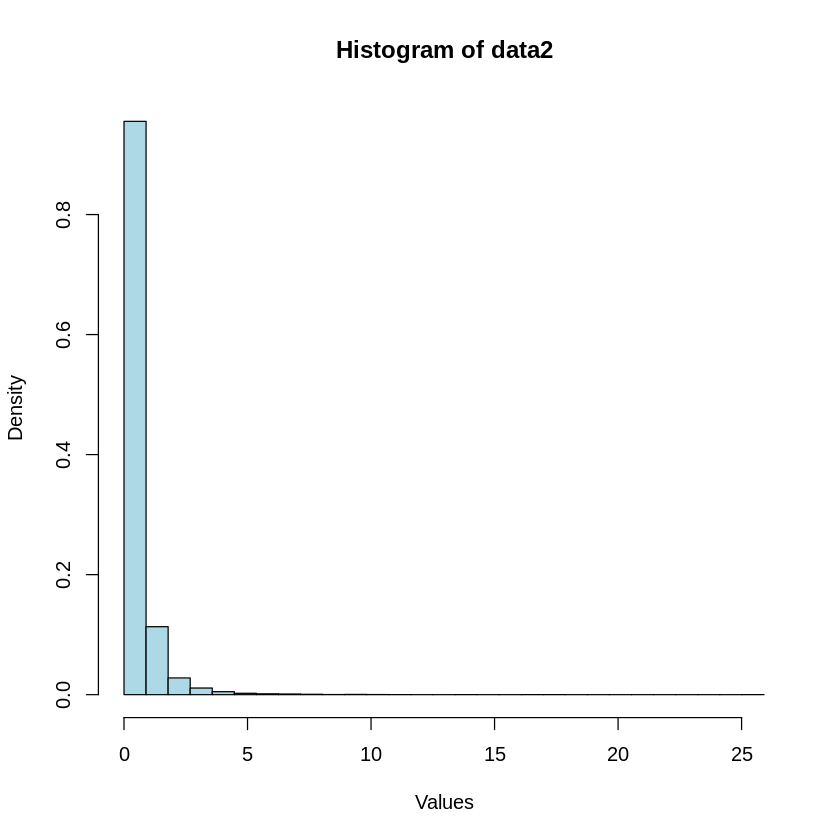

In [13]:
# Read in the dataset
data2 <- read.table("data2", header = TRUE)

# Check the structure of data2
str(data2)

# If data2 has only one column, convert it to a numeric vector
data2_numeric <- as.numeric(unlist(data2))

# Define bin breaks
br <- seq(min(data2_numeric), max(data2_numeric), length.out = 30)  # Adjust bin count if needed

# Generate histogram with density on y-axis
hist(data2_numeric, prob = TRUE, breaks = br, 
     main = "Histogram of data2", 
     xlab = "Values", 
     ylab = "Density", 
     col = "lightblue", 
     border = "black")


> Decide whether this data set looks like an exponential distribution, a normal distribution, or a Pareto distribution. (See your table of distributions for the pdfs.)

> Once you have decided on a distribution, superimpose the pdf on the histogram using estimates for the parameter(s) that seem intuitive to you. (Don't worry too much about getting a good fit. We will be able to get a better result later in the course after we learn formal methods for estimating parameters!)

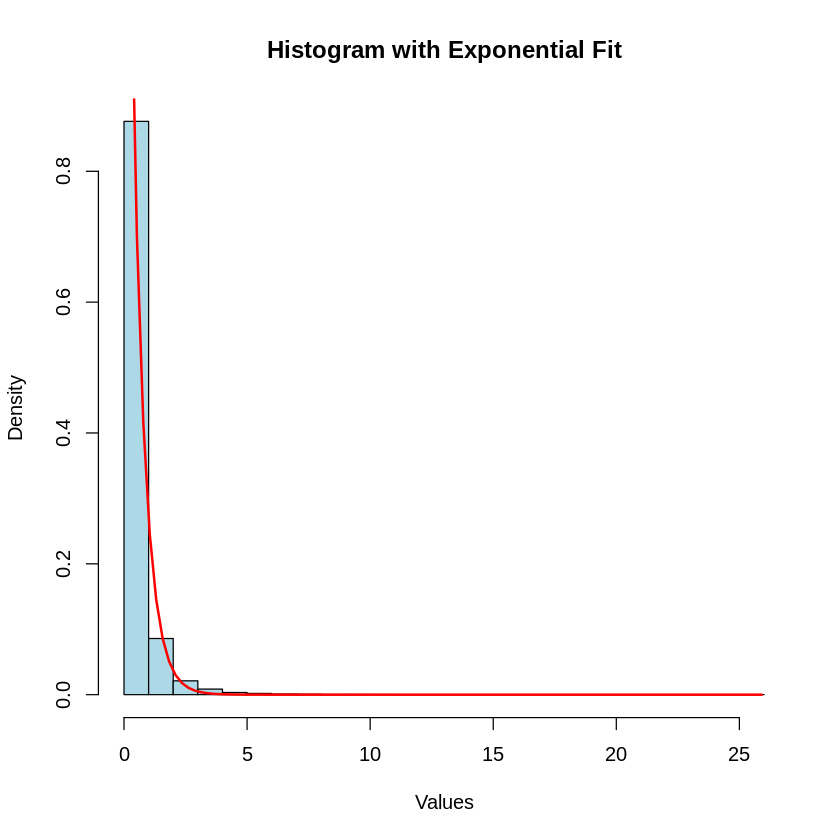

In [14]:
# Estimate lambda (rate parameter) for exponential
lambdahat <- 1 / mean(data2_numeric)

# Generate x-values for the PDF curve
x <- seq(min(data2_numeric), max(data2_numeric), length.out = 100)

# Compute exponential density values
fx <- lambdahat * exp(-lambdahat * x)

# Plot histogram
hist(data2_numeric, prob = TRUE, breaks = 30, 
     main = "Histogram with Exponential Fit", 
     xlab = "Values", 
     ylab = "Density", 
     col = "lightblue", 
     border = "black")

# Overlay exponential PDF curve
lines(x, fx, col = "red", lwd = 2)


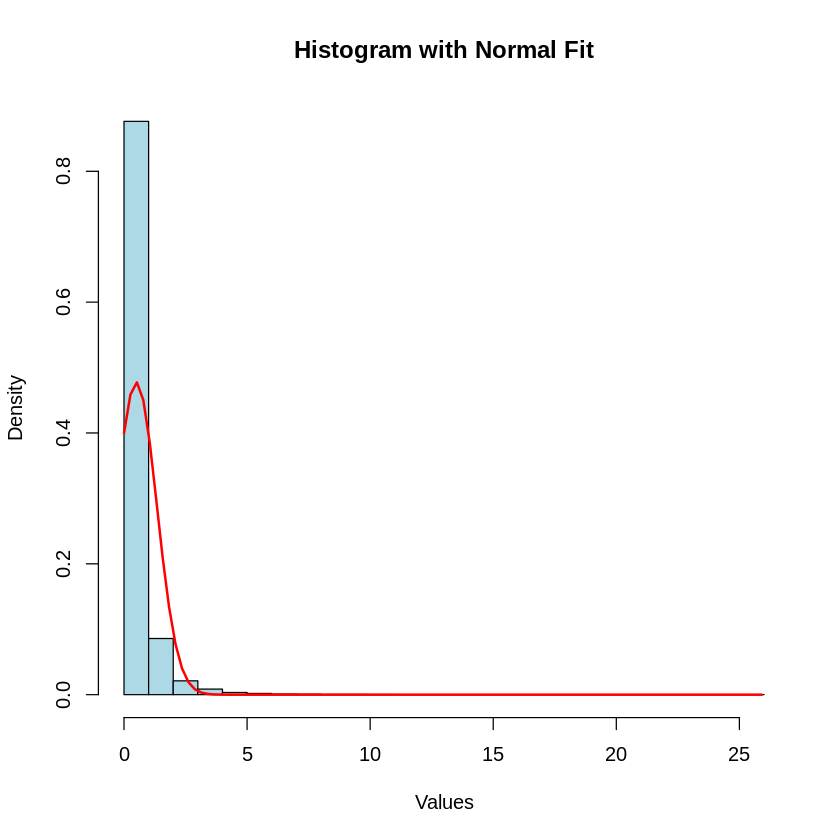

In [15]:
# Estimate mean and standard deviation
mu <- mean(data2_numeric)
sigma <- sd(data2_numeric)

# Generate x-values for the PDF curve
x <- seq(min(data2_numeric), max(data2_numeric), length.out = 100)

# Compute normal density values
fx <- dnorm(x, mean = mu, sd = sigma)

# Plot histogram
hist(data2_numeric, prob = TRUE, breaks = 30, 
     main = "Histogram with Normal Fit", 
     xlab = "Values", 
     ylab = "Density", 
     col = "lightblue", 
     border = "black")

# Overlay normal PDF curve
lines(x, fx, col = "red", lwd = 2)


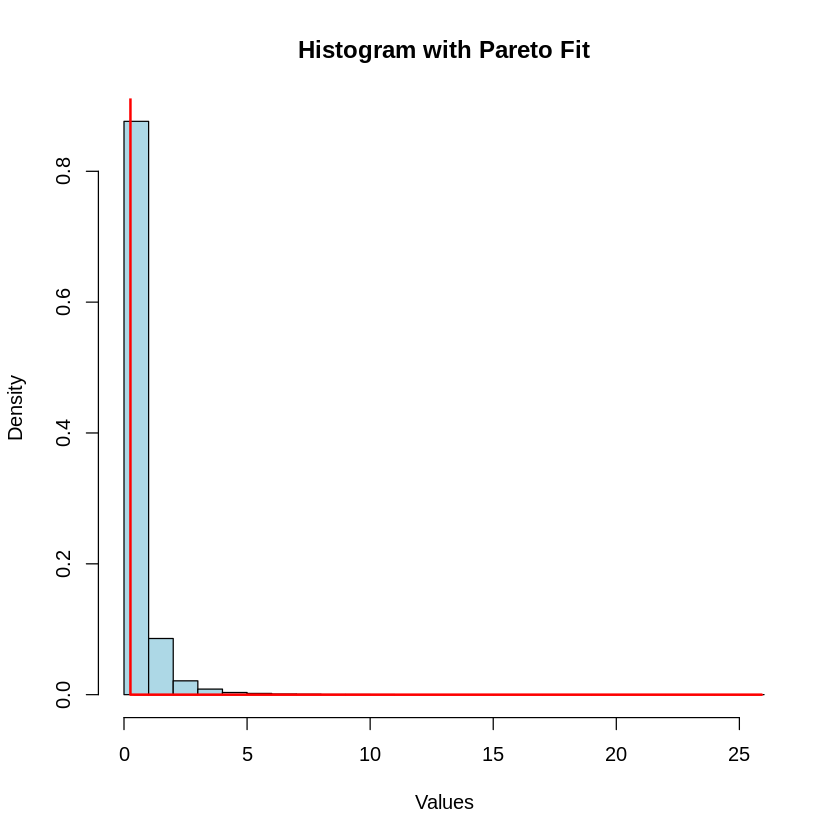

In [16]:
# Estimate Pareto parameters
xm <- min(data2_numeric)
alpha <- 1 + length(data2_numeric) / sum(log(data2_numeric / xm))

# Generate x-values for the PDF curve
x <- seq(xm, max(data2_numeric), length.out = 100)

# Compute Pareto density values
fx <- (alpha * xm^alpha) / (x^(alpha + 1))

# Plot histogram
hist(data2_numeric, prob = TRUE, breaks = 30, 
     main = "Histogram with Pareto Fit", 
     xlab = "Values", 
     ylab = "Density", 
     col = "lightblue", 
     border = "black")

# Overlay Pareto PDF curve
lines(x, fx, col = "red", lwd = 2)


In [18]:
print('Thank you for stopping by!')

[1] "Thank you for stopping by!"


In [21]:
print('By:Sulay Cay, Inspired by University of Colorafo Boulder')

[1] "By:Sulay Cay, Inspired by University of Colorafo Boulder"
